In [4]:
# Importing necessary libraries
import pandas as pd
import random
import numpy as np
from plotnine import ggplot, aes, geom_histogram, facet_wrap, ylab, xlab, ggtitle, labs, geom_vline

# Load the data from the CSV file
school_data = pd.read_csv('school.csv')
# Filtering the data to include only classes with an average difficulty rating of at least 3
difficult_classes = school_data[school_data['AvgCourseDifficulty'] < 2]

# Calculating the proportion of students in difficult classes
proportion_difficult_classes = len(difficult_classes) / len(school_data)

print("Observed proportion of students taking classes with difficulty less than 2:")
print(proportion_difficult_classes)

Observed proportion of students taking classes with difficulty less than 2:
0.05172413793103448


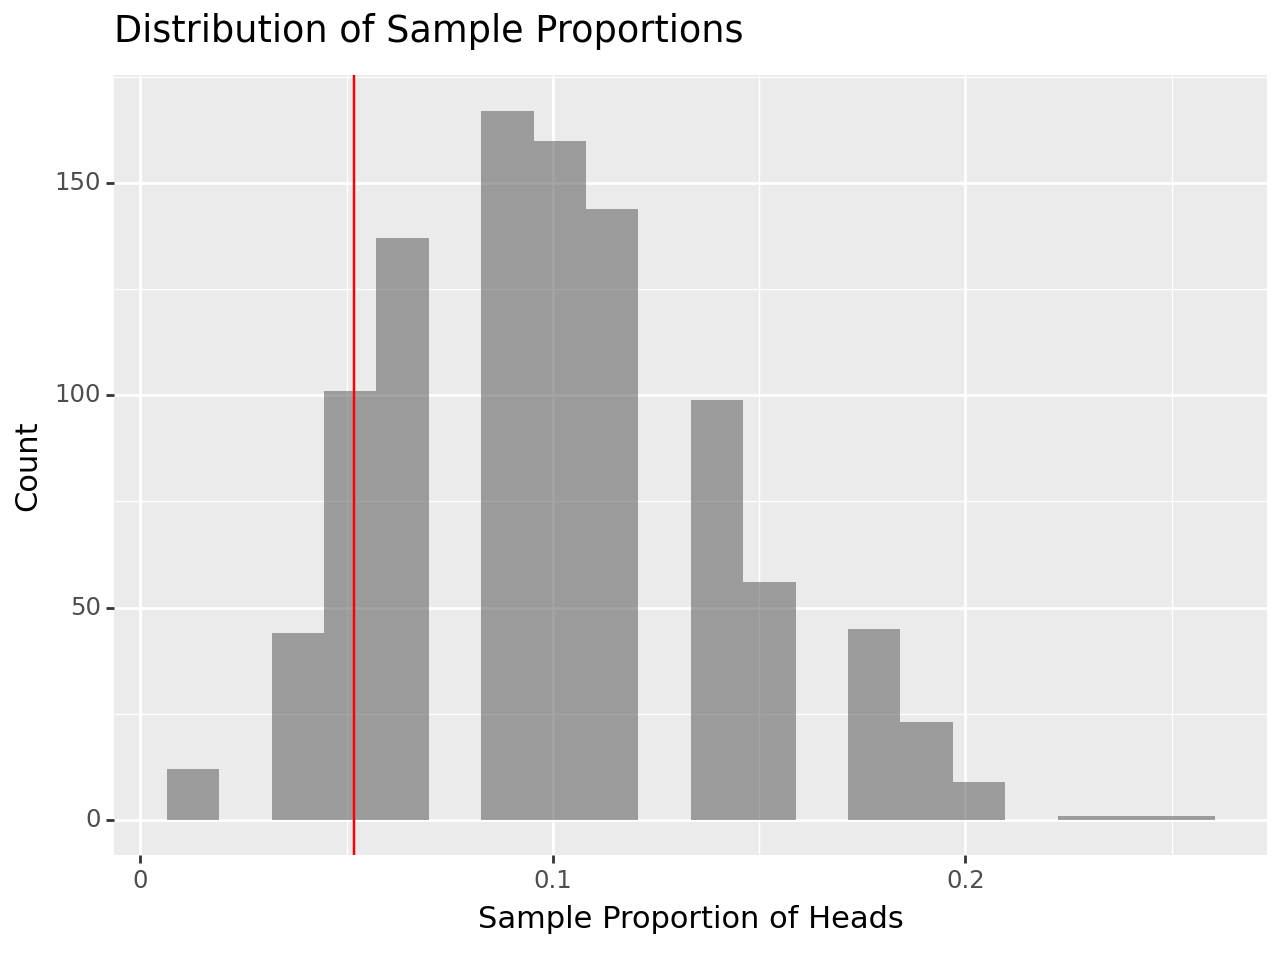

<Figure Size: (640 x 480)>

In [5]:
# Perform simulation-based hypothesis test

# Create data frame to hold simulation values
ns = len(school_data) # Numbers of Flips
sim_n = 1000
d = pd.DataFrame({
  'n' : [0]*sim_n,
})

null_value = 0.10

# Perform simulations
k = 0
for i in np.arange(sim_n):
    x = random.choices(["Heads", "Tails"], weights = [null_value, 1-null_value], k = ns)

    d['n'][k] = sum(np.char.equal(x, "Heads"))/ns
    k = k + 1

# Plot simulations
(ggplot(d, aes(x = 'n')) +
  geom_histogram(alpha = .55, bins = 20) +
  geom_vline(xintercept = proportion_difficult_classes, color = "red") +
  labs(
      x = "Sample Proportion of Heads",
      y = "Count",
      fill = "Sample Size"
  ) +
  ggtitle("Distribution of Sample Proportions")
)

In [6]:
# Compute and print p-value
print("P-value:")
print(sum(d['n'] < proportion_difficult_classes)/sim_n)

P-value:
0.056
